/tmp/ipykernel_18705/2817905618.py:15: RuntimeWarning: Mean of empty slice
  cleanLatencyAvg    = np.nanmean(   cleanLatency, axis=0)
/usr/lib64/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/tmp/ipykernel_18705/2817905618.py:17: RuntimeWarning: Mean of empty slice
  infectedLatencyAvg = np.nanmean(infectedLatency, axis=0)


/home/user/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


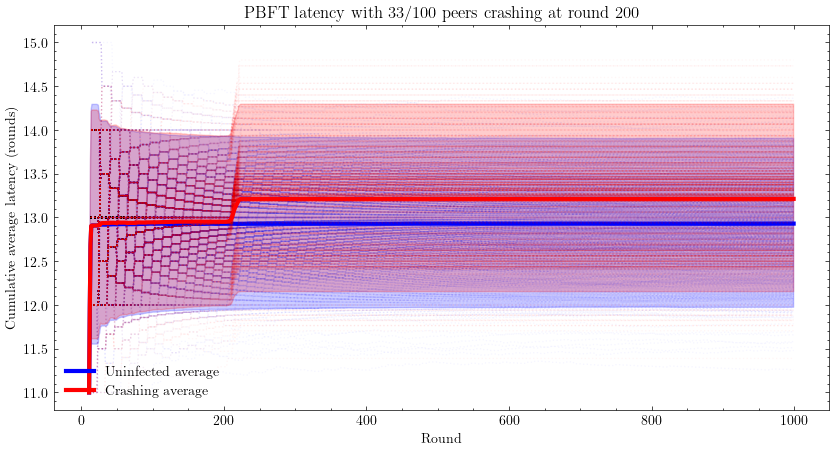

In [84]:
#!make run
%matplotlib inline
import matplotlib.pyplot as plt
import scienceplots  # scientific themes for matplotlib
import numpy as np
import json

clean    = json.load(open("analysis/PBFT/d10/r1000/p100/i00t.out"))
infected = json.load(open("analysis/PBFT/d10/r1000/p100/i33t.out"))

cleanLatency    = np.array(list(map(lambda x: x['latency'],    clean['tests'])), dtype=np.float64)
infectedLatency = np.array(list(map(lambda x: x['latency'], infected['tests'])), dtype=np.float64)

# averages and standard deviations, ignoring None
cleanLatencyAvg    = np.nanmean(   cleanLatency, axis=0)
cleanLatencyStd    = np.nanstd(    cleanLatency, axis=0)
infectedLatencyAvg = np.nanmean(infectedLatency, axis=0)
infectedLatencyStd = np.nanstd( infectedLatency, axis=0)

# create an array for the x axis. A range from 0 to ...
x = np.arange(0, len(cleanLatency[0]))

with plt.style.context('science'):
    # set line color to black
    unin = plt.plot(x, cleanLatency.T,   ':', color='blue', alpha=.035, label='Uninfected')
    uninAvg = plt.plot(x, cleanLatencyAvg.T,     color='blue', linewidth=3, label='Uninfected average')
    plt.fill_between(x, cleanLatencyAvg.T-1.96*cleanLatencyStd.T, cleanLatencyAvg.T+2*cleanLatencyStd.T, linestyle='',   color='blue', linewidth=3, alpha=.2, label='Uninfected 95% error')
    crsh = plt.plot(x, infectedLatency.T, ':', color='red', alpha=.035, label='Crashing')
    crshAvg = plt.plot(x, infectedLatencyAvg.T,   color='red', linewidth=3, label='Crashing average')
    plt.fill_between(x, infectedLatencyAvg.T-1.96*infectedLatencyStd.T, infectedLatencyAvg.T+2*infectedLatencyStd.T, linestyle='',   color='red', linewidth=3, alpha=.2, label='Crashing 95% error')
    plt.legend(handles=[uninAvg[0], crshAvg[0]], mode="expand")
    # set line type to dotted for the first and solid for the second
    plt.xlabel('Round')
    plt.ylabel('Cumulative average latency (rounds)')
    plt.title('PBFT latency with 33/100 peers crashing at round 200')
    # make plot bigger
    plt.gcf().set_size_inches(10, 5)
    plt.show()
